Elaboration from the example given in [Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

### Overview

- [Grouping objects by similarity using k-means](#Grouping-objects-by-similarity-using-k-means)
  - [Using the elbow method to find the optimal number of clusters](#Using-the-elbow-method-to-find-the-optimal-number-of-clusters)
  - [Quantifying the quality of clustering via silhouette plots](#Quantifying-the-quality-of-clustering-via-silhouette-plots)

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

# Grouping objects by similarity using k-means
In this example we will use an _artificial_ data set

1. load the data file from `'ex1_4dim_data.csv'`
1. check the shape and produce a pairplot of the data  
1. observe the pairplots, decide which are the most interesting columns, to use in the plots of the clusters and comment your choice  
1. make a 2d plot of the two most promising columns  
1. Use the elbow method to find the optimal number of clusters: test `KMeans` with varying number of clusters, from 2 to 10
    1. fit the model with the data 
    1. get the inertia from the fitted model
    1. compute silhouette score  
1. Generate the best clustering
    1. Choose the optimal number of clusters looking at the plots, then 
    1. fit the model with the data using that number, 
    1. plot the clusters and 
    1. show the distortion
    1. plot the silhouette scores of the individual samples using the `plot_silhouette` function provided
1. For comparison, repeat 6 with two clusters
        

In [2]:
data_file = 'ex1_4dim_data.csv'
delimiter = ','
df = pd.read_csv(data_file,names=['column1','column2','column3','column4'])

In [3]:
df.head()
df.shape

(1500, 4)

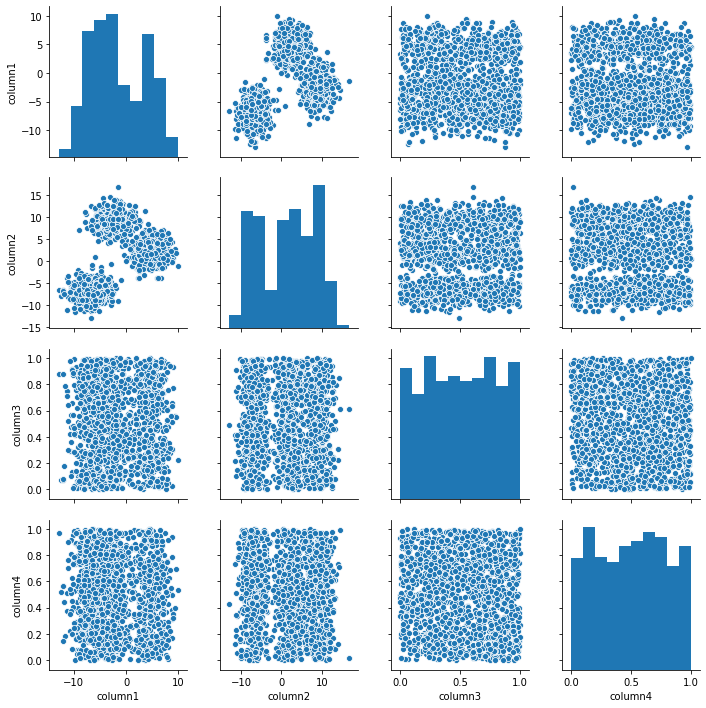

In [4]:
sns.pairplot(df)
plt.show()

### 3. Observe the pairplots

Seems Realationship between column1 and column2 have tightly clustering points than other realationships



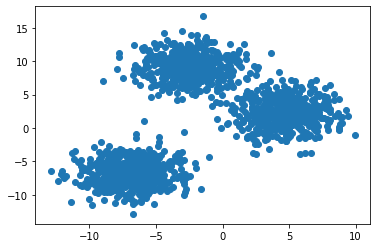

In [5]:
plt.scatter(df['column1'],df['column2'],marker='o')

In [6]:
X = df.iloc[:,[0,1]]

## 5. Using the elbow method to find the optimal number of clusters 
We will try __k_means__ with a number of clusters varying from 2 to 10

- prepare two emptys lists for inertia and silhouette scores
- For each value of the number of clusters:  
  - initialize an estimator for `KMeans` and `fit_predict`
  - we will store the distortion (from the fitted model) in the variable `distortions`
  - using the function `silhouette_score` from `sklearn.metrics` with arguments the data and the fitted labels, we will fill the variable `silhouette_scores`

Then we will plot the two lists in the y axis, with the range of k in the x axis.
The plot with two different scales in the `y` axis can be done according to the example shown in the notebook `two_scales.ipynb`.

[0.624089780231568, 0.6830901212186561, 0.5565164173074918, 0.4506230948293825, 0.3072976560089675, 0.31067852704271937, 0.31691291212591693, 0.32014380827784505, 0.3136795933543329]


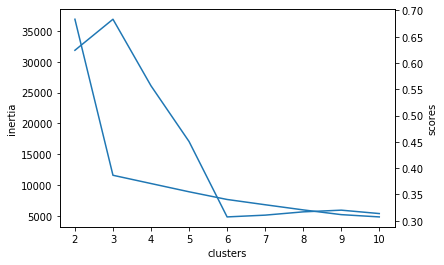

In [7]:
clusters = range(2,11)
inertias = []
silhouettescores = []

for cluster in clusters:
    model = KMeans(n_clusters=cluster)
    labels = model.fit_predict(X)
    distortions = model.inertia_  
    inertias.append(distortions)
    silhouettescores.append(silhouette_score(df,labels))
#print(type(clusters))
print(silhouettescores)
fig, ax1 = plt.subplots()
ax1.plot(clusters,inertias)
ax2 = ax1.twinx()
ax2.plot(clusters,silhouettescores)
ax1.set_xlabel('clusters')
ax1.set_ylabel('inertia')
ax2.set_ylabel('scores')
plt.show()

##from the above plot , at cluster 3 ..the inertia started decreasing and also we are getting almost accuracy between the cluster 
##3 and 4 
# So , we can able confirm that, KMeans clustering able to divide our dataset into 3 clusters

### 6. Generate the best clustering

In [8]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.predict(X)
centroids=model.cluster_centers_
print(labels)
print(centroids)

[2 0 0 ... 2 0 2]
[[-6.89370123 -6.83658926]
 [-2.50474216  9.09132188]
 [ 4.75108211  2.11850327]]


In [9]:
from plot_clusters import plot_clusters

In [10]:
help(plot_clusters)

Help on function plot_clusters in module plot_clusters:

plot_clusters(X, y, dim, points, labels_prefix='cluster', points_name='centroids', colors=<matplotlib.colors.ListedColormap object at 0x000001436FE4AFC8>, points_color=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points



In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

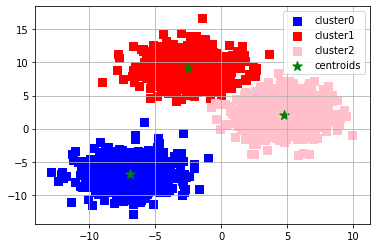

In [12]:
plt.scatter(X.iloc[labels==0,0],X.iloc[labels==0,1],s=50,c='blue',label='cluster0',marker='s')
plt.scatter(X.iloc[labels==1,0],X.iloc[labels==1,1],s=50,c='red',label='cluster1',marker='s')
plt.scatter(X.iloc[labels==2,0],X.iloc[labels==2,1],s=50,c='pink',label='cluster2',marker='s')

plt.scatter(centroids[:,0],centroids[:,1],s=100,c='green',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [13]:
np.sum(distortions)

4826.329835436627

## 6.D. Quantifying the quality of clustering  via silhouette plots
The silhouette scores for the individual samples are computed with the function `silhouette_samples`

The function `plot_silhouette` produces a 'horizontal bar-plot', with one bar for each sample, where the length of the bar is proportional to the silhouette score of the sample. The bars are grouped for cluster and sorted for decreasing length. 

A vertical line represents the silhouette score, i.e. the average on all the samples

In [17]:
from plot_silhouette2 import plot_silhouette

In [18]:
help(plot_silhouette)

Help on function plot_silhouette in module plot_silhouette2:

plot_silhouette(silhouette_vals, y, colors=<matplotlib.colors.ListedColormap object at 0x000001436FE4AFC8>, plot_noise=False)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    plot_noise:      boolean, assumes the noise to be labeled with a negative integer



ValueError: source code string cannot contain null bytes

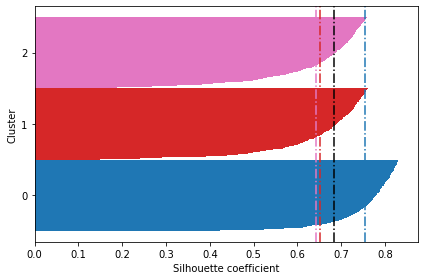

In [23]:
# 6.D to fill
%run plot_silhouette

silhouette_vals = silhouette_samples(df, labels, metric='euclidean')
plot_silhouette(silhouette_vals, labels)

### 7. Comparison to "bad" clustering:

ValueError: source code string cannot contain null bytes

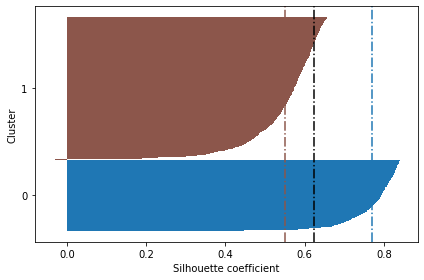

In [25]:
# 7. to fill
%run plot_silhouette

kmeans_ = KMeans(n_clusters=2, random_state=rnd_state)
y_pred_ = kmeans_.fit_predict(df)
silhouette_vals = silhouette_samples(df, y_pred_, metric='euclidean')

plot_silhouette(silhouette_vals, y_pred_)